In [1]:
from Environment import GridWorld
import numpy as np
import random
import matplotlib.pyplot as plt
import sys

In [2]:
env = GridWorld((10,10),0)
reward_grid = env.reset_Qlearning()
q_table = np.zeros((env.observation_space, env.action_space))

In [3]:
discount_factor = 0.98
num_episodes = 10000
max_steps_per_episode = reward_grid.shape[0] * reward_grid.shape[1] * 10
min_stepsl = []
# Convert grid-world positions to state indices
def state_to_index(state):
    return np.ravel_multi_index(state, dims=grid_world.shape)


def valid_actions(index,action):
    if action == 0:
        if index[0] == 0:
            return False
        else:
            return True
    elif action == 1:
        if index[0] == reward_grid.shape[0] - 1:
            return False
        else:
            return True
    elif action == 2:
        if index[1] == 0:
            return False
        else:
            return True
    elif action == 3:
        if index[1] == reward_grid.shape[1] - 1:
            return False
        else:
            return True
steps = []
min_steps = max_steps_per_episode

# Q-learning algorithm
for episode in range(num_episodes):
    exploration_prob = max(0.01, min(1.0, 1.0 - episode / num_episodes))
    learning_rate = 0.1
    state = (0, 0)
    grid_world = np.zeros(reward_grid.shape)
    grid_world[state] = 1
    state_index = state_to_index(state)
    done = False
    episode_reward = 0
    for step in range(max_steps_per_episode):
        # Epsilon-greedy policy for action selection
        if random.uniform(0, 1) < exploration_prob:
            action = random.randint(0, 3)  # Exploration
        else:
            action = np.argmax(q_table[state_index, :])  # Exploitation
        if not valid_actions(state,action):
                reward = -10

        # Take the action and observe the next state and reward
        if action == 0:  # Up
            next_state = (max(0, state[0] - 1), state[1])
        elif action == 1:  # Down
            next_state = (min(grid_world.shape[0] - 1, state[0] + 1), state[1])
        elif action == 2:  # Left
            next_state = (state[0], max(0, state[1] - 1))
        else:  # Right
            next_state = (state[0], min(grid_world.shape[1] - 1, state[1] + 1))

        next_state_index = state_to_index(next_state)

        # Define rewards based on the grid-world environment
        if grid_world[next_state] == 0:
            reward = 2
            grid_world[next_state] = 1
        elif grid_world[next_state] == 1:
            reward =  - 1
        
        if grid_world.all() == 1:
            reward += max_steps_per_episode - step
            if step < min_steps:
                min_stepsl.append(step)
                reward += 100
                min_steps = step
            done = True

        # Q-value update using the Bellman equation
        q_table[state_index, action] = (1 - learning_rate) * q_table[state_index, action] + \
                                      learning_rate * (reward + discount_factor * np.max(q_table[next_state_index, :]))

        state = next_state
        state_index = next_state_index
        episode_reward += reward
        if done:
            break
    steps.append(step+1)
    print(f"Episode {episode} completed with total reward {episode_reward} in {step+1} steps.                                              ", end='\r')



KeyboardInterrupt: 

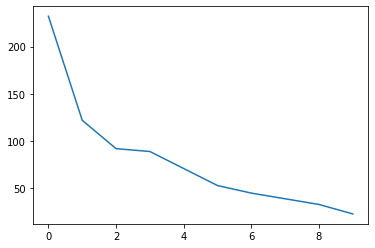

In [ ]:
plt.plot(min_stepsl)

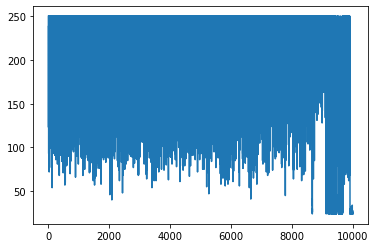

In [ ]:
plt.plot(steps)

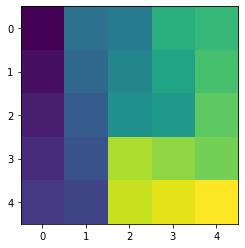

In [ ]:
a = np.zeros(reward_grid.shape)
grid = np.zeros(reward_grid.shape)
init = (0,0)
a[init] = 1
step = 1
while step < grid.shape[0] * grid.shape[1]:
    action = np.argmax(q_table[state_to_index(init)])
    if action == 0:
        init = (init[0]-1,init[1])
    elif action == 1:
        init = (init[0]+1,init[1])
    elif action == 2:
        init = (init[0],init[1]-1)
    elif action == 3:
        init = (init[0],init[1]+1)
    a[init] = 1
    grid[init] = step
    step += 1
plt.imshow(grid)